<a href="https://colab.research.google.com/github/pb-roshith/face-mask-detection-using-CNN/blob/main/face_mask_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [3]:
!mkdir .p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘.p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:09<00:00, 22.1MB/s]
100% 163M/163M [00:09<00:00, 18.0MB/s]


In [5]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted successfully dude")

extracted successfully dude


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask = os.listdir('/content/data/with_mask')
print(with_mask[0:5])

['with_mask_1664.jpg', 'with_mask_4.jpg', 'with_mask_3048.jpg', 'with_mask_3160.jpg', 'with_mask_1059.jpg']


In [9]:
with_outmask = os.listdir('/content/data/without_mask')
print(with_outmask[0:5])

['without_mask_2217.jpg', 'without_mask_2900.jpg', 'without_mask_446.jpg', 'without_mask_1501.jpg', 'without_mask_2554.jpg']


In [10]:
print('Number of with mask images : ', len(with_mask))
print('Number of without mask images : ', len(with_outmask))

Number of with mask images :  3725
Number of without mask images :  3828


In [11]:
with_mask_label = [1]*3725
with_outmask_label = [0]*3828

In [12]:
print(with_mask_label[0:5])
print(with_outmask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
labels = with_mask_label + with_outmask_label
print(len(labels))

7553


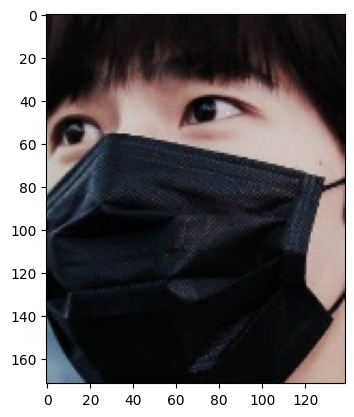

In [14]:
img = mpimg.imread('/content/data/with_mask/with_mask_245.jpg')
imgplot = plt.imshow(img)
plt.show()

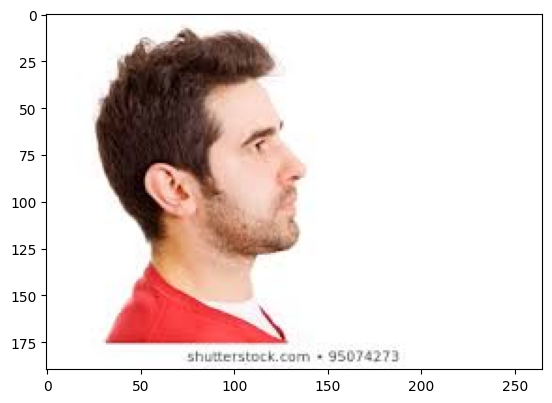

In [15]:
img = mpimg.imread('/content/data/without_mask/without_mask_2589.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
data=[]

with_mask_path = '/content/data/with_mask/'

for im in with_mask:
  i=Image.open(with_mask_path + im)
  i=i.resize((128, 128))
  i=i.convert('RGB')
  i=np.array(i)
  data.append(i)

without_mask_path = '/content/data/without_mask/'

for im in with_outmask:
  i=Image.open(without_mask_path + im)
  i=i.resize((128, 128))
  i=i.convert('RGB')
  i=np.array(i)
  data.append(i)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [20]:
x=np.array(data)
y=np.array(labels)

In [21]:
type(x)
type(y)

numpy.ndarray

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [23]:
x_train_scale = x_train/255
x_test_scale = x_test/255

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [31]:
history = model.fit(x_train_scale, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
170/170 [==============================] - 4s 22ms/step - loss: 0.1404 - acc: 0.9465 - val_loss: 0.2011 - val_acc: 0.9355
Epoch 2/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1178 - acc: 0.9546 - val_loss: 0.1599 - val_acc: 0.9405
Epoch 3/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1072 - acc: 0.9616 - val_loss: 0.1945 - val_acc: 0.9405
Epoch 4/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0984 - acc: 0.9641 - val_loss: 0.1865 - val_acc: 0.9339
Epoch 5/50
170/170 [==============================] - 3s 19ms/step - loss: 0.0898 - acc: 0.9651 - val_loss: 0.2423 - val_acc: 0.9289
Epoch 6/50
170/170 [==============================] - 3s 18ms/step - loss: 0.0699 - acc: 0.9774 - val_loss: 0.1967 - val_acc: 0.9421
Epoch 7/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0689 - acc: 0.9755 - val_loss: 0.2426 - val_acc: 0.9421
Epoch 8/50
170/170 [==============================] - 3s 17ms/step - 

In [32]:
loss, accuracy = model.evaluate(x_test_scale, y_test)
print("Test Accuracy :", accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.5456 - acc: 0.9338
Test Accuracy : 0.9338186383247375


Path of the image to be predicted : /content/test.jpeg


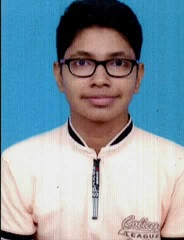

1/1 [==============================] - 0s 18ms/step
[[0.71376103 0.20344535]]
0
not wearing mask


In [33]:
input_image_path = input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image, (128, 128))
input_image_scale = input_image_resize/255
input_image_reshape = np.reshape(input_image_scale, [1, 128, 128, 3])
input_predict = model.predict(input_image_reshape)
print(input_predict)
input_pred_label = np.argmax(input_predict)
print(input_pred_label)
if input_pred_label==1:
  print('wearing mask')
else:
  print('not wearing mask')